# Playing with Warhammer dice

## Import libraries and set seaborn style

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

sns.set_style("dark")

## Set variables

In [194]:

num_dice = 20                                                   #number of dice to roll
num_sets = 100000                                               #samples of num_dice to roll

hit_on = 3
attack_strength = 4
target_toughness = 4
save_on = 5

if attack_strength >= target_toughness*2:
    wound_on = 2
elif attack_strength > target_toughness:
    wound_on = 3
elif attack_strength*2 <= target_toughness:
    wound_on = 6
elif attack_strength < target_toughness:
    wound_on = 5
else:
    wound_on = 4

## Hits

### Roll hit dice samples

In [195]:
i=0
raw_hit_rolls=[]                                                #array of hits per roll

while i < num_sets:
    individual_roll = np.random.randint(1,7, size=(num_dice))   #roll num_dice
    hits = sum(r >= hit_on for r in individual_roll)            #count number of hits in roll
    raw_hit_rolls.append(hits)                                  #append number of hits to array
    i +=1

hRolls = pd.DataFrame(raw_hit_rolls, columns=["hits"])          #load hit array into dataframe

### Summarize hit data

In [196]:
hStats = hRolls.hits.drop_duplicates()                          #create new dataframe of unique hit count values
hStats = pd.DataFrame(hStats, columns=["hits"])
hStats = hStats.reset_index(drop=True)                          #reset index to avoid collisions when adding rows

hMin=min(hStats.hits.copy())
hMax=max(hStats.hits)+1
i=0                                                             #add missing tails to hStats so charts plot full range
while i < hMin :
    hStats.loc[len(hStats.index)] = i
    i +=1
while hMax <= num_dice:
    hStats.loc[len(hStats.index)] = hMax
    hMax +=1

hStats = hStats.sort_values("hits")

h_avg=hRolls.hits.mean()                                        #average of all to-hit rolls
h_std=hRolls.hits.std()                                         #standard deviation of hits
h_avg_cdf=st.norm.cdf(0)                                        #cumulative probability of h_avg
h_n2std= -2*h_std+h_avg                                         #get value at -2 std
h_p2std= 2*h_std+h_avg                                          #get value at +2 std
hStats["z"]=(hStats.hits - h_avg)/h_std                         #set z values for hit counts
hStats["cdf"] = st.norm.cdf(hStats.z)                           #set cumulative probability of hits
hStats["icdf"] = 1-st.norm.cdf(hStats.z)                        #set cumulative probability of hits


### Hit total probability distribution

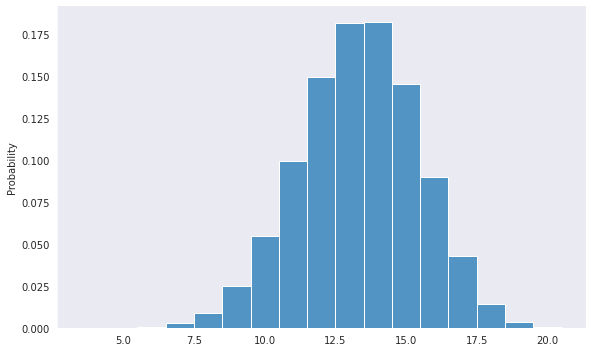

In [197]:
sns.displot(hRolls, bins=max(hStats.hits), discrete=True, stat="probability", height=5, aspect=10/6, legend=None)

### Inverse cumulative probability of hit totals

<AxesSubplot:xlabel='hits', ylabel='inverse cumulataive probability'>

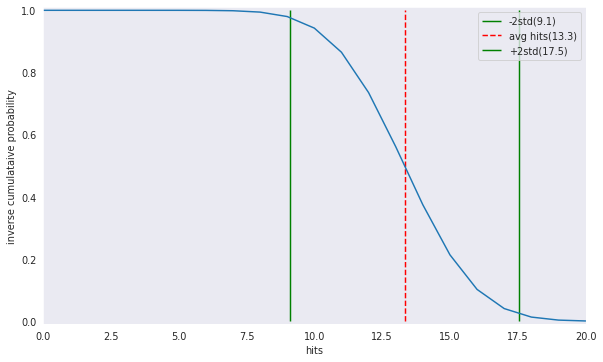

In [198]:
fig, ax = plt.subplots(figsize = (10,6), dpi = 70)
ax.set_xlim(0,max(hStats.hits))
ax.set_ylim(-0.01,1.01)
ax.set_ylabel("inverse cumulataive probability")
ax.vlines(x=h_n2std,ymin=0,ymax=1,label="-2std("+str(round(h_n2std,1))+")", colors="green")
ax.vlines(x=h_avg,ymin=0,ymax=1,label="avg hits("+str(round(h_avg,1))+")", colors="red", linestyles="dashed")
ax.vlines(x=h_p2std,ymin=0,ymax=1,label="+2std("+str(round(h_p2std,1))+")", colors="green")
sns.lineplot(data=hStats, x="hits", y="icdf")

## Wounds

### Roll wound dice samples

In [199]:
raw_wound_rolls = []

for h in hRolls.hits:
    individual_wroll = np.random.randint(1,7, size=(h))          #roll wounds for hits in sample
    wounds = sum(r >= wound_on for r in individual_wroll)        #count number of wounds in roll
    raw_wound_rolls.append(wounds)                               #append number of wounds to array
    h +=1

wRolls = pd.DataFrame(raw_wound_rolls, columns=["wounds"])

### Summarize wound data

In [200]:
wStats = wRolls.wounds.drop_duplicates()                        #create new dataframe of unique wound count values
wStats = pd.DataFrame(wStats, columns=["wounds"])
wStats = wStats.reset_index(drop=True)                          #reset index to avoid collisions when adding rows

wMin=min(wStats.wounds.copy())
wMax=max(wStats.wounds)+1
i=0                                                             #add missing tails to wStats so charts plot full range
while i < wMin :
    wStats.loc[len(wStats.index)] = i
    i +=1
while wMax <= num_dice:
    wStats.loc[len(wStats.index)] = wMax
    wMax +=1

wStats = wStats.sort_values("wounds")

w_avg=wRolls.wounds.mean()                                      #average of all to-wound rolls
w_std=wRolls.wounds.std()                                       #standard deviation of wounds
w_avg_cdf=st.norm.cdf(0)                                        #cumulative probability of w_avg
w_n2std= -2*w_std+w_avg                                         #get value at -2 std
w_p2std= 2*w_std+w_avg                                          #get value at +2 std
wStats["z"]=(wStats.wounds - w_avg)/w_std                       #set z values for wound counts
wStats["cdf"] = st.norm.cdf(wStats.z)                           #set cumulative probability of wounds
wStats["icdf"] = 1-st.norm.cdf(wStats.z)                        #set cumulative probability of wounds

### Wound total probability distribution

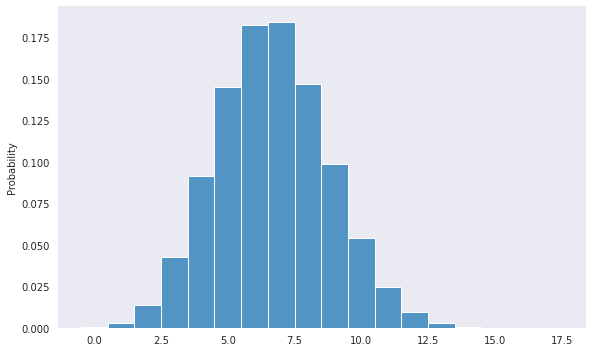

In [209]:
sns.displot(wRolls, bins=max(wStats.wounds), discrete=True, stat="probability", height=5, aspect=10/6, legend=None)

### Inverse cumulative probability of wound totals

<AxesSubplot:xlabel='wounds', ylabel='inverse cumulataive probability'>

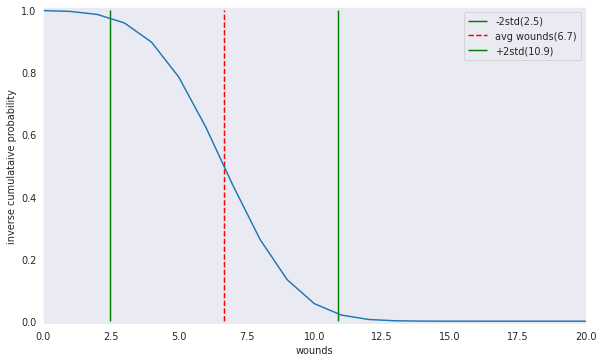

In [202]:
fig, ax = plt.subplots(figsize = (10,6), dpi = 70)
ax.set_xlim(0,max(wStats.wounds))
ax.set_ylim(-0.01,1.01)
ax.set_ylabel("inverse cumulataive probability")
ax.vlines(x=w_n2std,ymin=0,ymax=1,label="-2std("+str(round(w_n2std,1))+")", colors="green")
ax.vlines(x=w_avg,ymin=0,ymax=1,label="avg wounds("+str(round(w_avg,1))+")", colors="red", linestyles="dashed")
ax.vlines(x=w_p2std,ymin=0,ymax=1,label="+2std("+str(round(w_p2std,1))+")", colors="green")
sns.lineplot(data=wStats, x="wounds", y="icdf")

## Saves

### Roll save samples

In [203]:
raw_save_rolls = []

for w in wRolls.wounds:
    individual_sroll = np.random.randint(1,7, size=(w))        #roll to save for wounds in sample
    saves = sum(s < save_on for s in individual_sroll)         #count number of saves in roll
    raw_save_rolls.append(saves)                               #append number of saves to array
    w +=1

sRolls = pd.DataFrame(raw_save_rolls, columns=["saves"])

### Summarize save data

In [204]:
sStats = sRolls.saves.drop_duplicates()                        #create new dataframe of unique hit count values
sStats = pd.DataFrame(sStats, columns=["saves"])
sStats = sStats.reset_index(drop=True)                         #reset index to avoid collisions when adding rows

sMin=min(sStats.saves.copy())
sMax=max(sStats.saves)+1
i=0                                                            #add missing tails to sStats so charts plot full range
while i < sMin :
    sStats.loc[len(sStats.index)] = i
    i +=1
while sMax <= num_dice:
    sStats.loc[len(sStats.index)] = sMax
    sMax +=1

sStats = sStats.sort_values("saves")

s_avg=sRolls.saves.mean()                                      #average of all save rolls
s_std=sRolls.saves.std()                                       #standard deviation of saves
s_avg_cdf=st.norm.cdf(0)                                       #cumulative probability of s_avg
s_n2std= -2*s_std+s_avg                                        #get value at -2 std
s_p2std= 2*s_std+s_avg                                         #get value at +2 std
sStats["z"]=(sStats.saves - s_avg)/s_std                       #set z values for wound counts
sStats["cdf"] = st.norm.cdf(sStats.z)                          #set cumulative probability of saves
sStats["icdf"] = 1-st.norm.cdf(sStats.z)                       #set cumulative probability of saves

### Failed saves total distribution

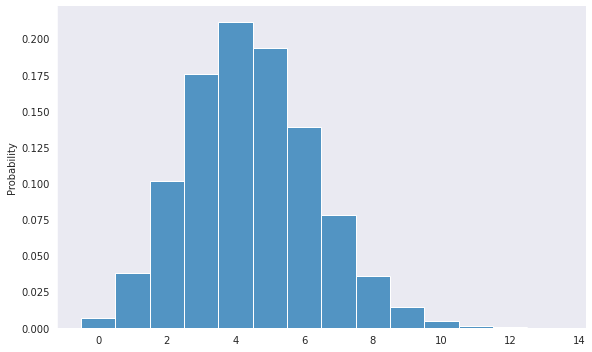

In [205]:
sns.displot(sRolls, bins=max(wStats.wounds), discrete=True, stat="probability", height=5, aspect=10/6, legend=None)

### Inverse cumulative probability of wound totals

<AxesSubplot:xlabel='saves', ylabel='inverse cumulataive probability'>

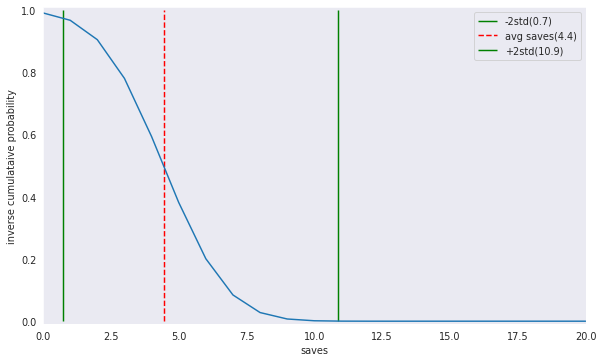

In [206]:
fig, ax = plt.subplots(figsize = (10,6), dpi = 70)
ax.set_xlim(0,max(sStats.saves))
ax.set_ylim(-0.01,1.01)
ax.set_ylabel("inverse cumulataive probability")
ax.vlines(x=s_n2std,ymin=0,ymax=1,label="-2std("+str(round(s_n2std,1))+")", colors="green")
ax.vlines(x=s_avg,ymin=0,ymax=1,label="avg saves("+str(round(s_avg,1))+")", colors="red", linestyles="dashed")
ax.vlines(x=w_p2std,ymin=0,ymax=1,label="+2std("+str(round(w_p2std,1))+")", colors="green")
sns.lineplot(data=sStats, x="saves", y="icdf")

## Summary

In [207]:
print("Expected values")
print("-------------")
print("Hits:                "+str(round(h_n2std,1))+"-"+str(round(h_p2std,1))+" (average "+str(round(h_avg,1))+")")
print("Potential wounds:    "+str(round(w_n2std,1))+"-"+str(round(w_p2std,1))+" (average "+str(round(w_avg,1))+")")
print("Failed saves:        "+str(round(s_n2std,1))+"-"+str(round(s_p2std,1))+" (average "+str(round(s_avg,1))+")")

Expected values
-------------
Hits:                9.1-17.5 (average 13.3)
Potential wounds:    2.5-10.9 (average 6.7)
Failed saves:        0.7-8.2 (average 4.4)
